In [375]:
from sklearn.cluster import KMeans
from sklearn import datasets 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score 
from joblib import dump, load

In [376]:
iris = datasets.load_iris() 
dataSet = pd.read_csv('mushrooms.data', header = None, nrows=1000)
dataSet = dataSet.apply(lambda x: pd.factorize(x)[0])
dataSet = dataSet.drop(columns=0)
df = pd.DataFrame(dataSet)

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Количество кластеров :  1


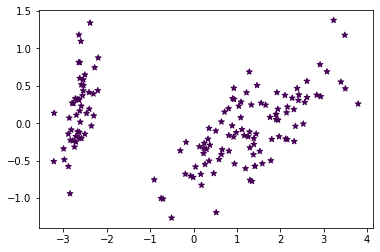

Количество кластеров :  2


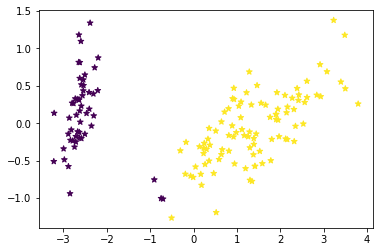

Количество кластеров :  3


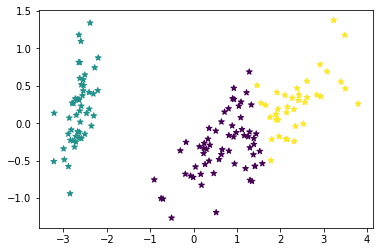

Количество кластеров :  4


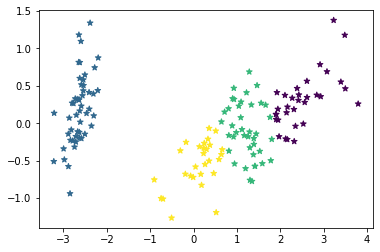

Количество кластеров :  5


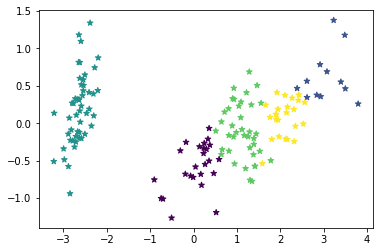

Количество кластеров :  6


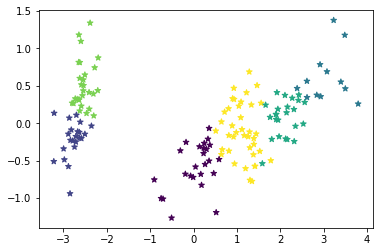

Количество кластеров :  7


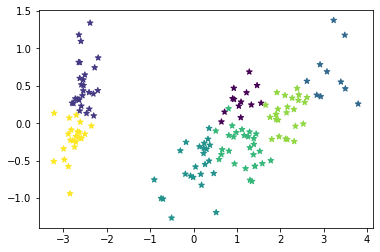

Количество кластеров :  8


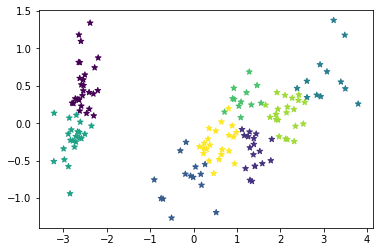

Количество кластеров :  9


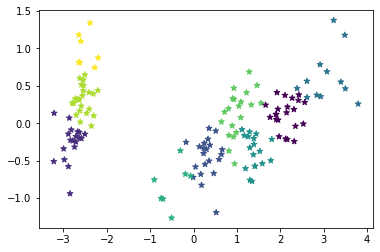

Количество кластеров :  10


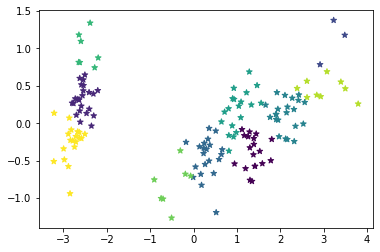

In [378]:
pca = PCA(n_components=2).fit(iris.data)
pca_2d = pca.transform(iris.data)
for clust in np.arange(1, 11, 1):
    model1 = KMeans(n_clusters = clust)
    model1.fit_predict(iris.data)   
    plt.scatter(pca_2d[:,0], pca_2d[:,1], c=model1.labels_, marker='*')   
    print("Количество кластеров : ", clust)
    plt.show()
    

2 : s_s = 0.6810461692117462
3 : s_s = 0.5528190123564095
4 : s_s = 0.49805050499728737
5 : s_s = 0.4887488870931055
6 : s_s = 0.3678464984712243
7 : s_s = 0.3494067645448534
8 : s_s = 0.3574536925852714
9 : s_s = 0.3419771472141546
10 : s_s = 0.3228590275315535
11 : s_s = 0.3196976531671868
12 : s_s = 0.2961675873461144
13 : s_s = 0.2867018944549767
14 : s_s = 0.3025272642900801
15 : s_s = 0.28749201452089834
16 : s_s = 0.2718014132971874
17 : s_s = 0.2913046587579525
18 : s_s = 0.29825142185176456
19 : s_s = 0.27816464139397484
20 : s_s = 0.28169532111943274


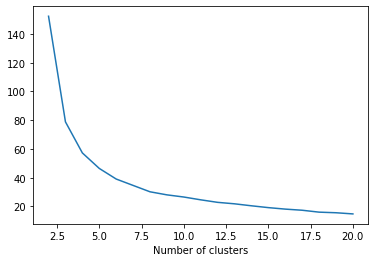

In [379]:
Wcss=[]
for i in range(2,21):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(iris.data)
    print(i, ": s_s =" ,silhouette_score(iris.data, kmeans.labels_))
    Wcss.append(kmeans.inertia_)
    
plt.plot(range(2,21), Wcss)
plt.xlabel('Number of clusters')
plt.show()

In [368]:
#Сохранение и загрузка модели
dump(kmeans, 'filename.joblib') 
clf = load('filename.joblib') 
clf.inertia_

3207.9394552546282